# Black Lives Matter Protest


In [2]:
from Helpers import *

#Constants
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

C:\Users\adapo\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\adapo\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


## Data reading

We obtain the data from Black Lives Matter protest from two different sources:

* From 2013 to 2016 with the dataset provided in the cluster: this data is missing information about the number of retweets, which we obtain using the *Tweepy* API, which given a tweet ID, queries Twitter to obtain different information from it

* From 2016 onwards we use tweets using *GetOldTweets-python* API, which returns all information but the language.

Black Lives Matter is a protest which has two sides, those in favour and against. As people against the protest don't normally use #BlackLivesMatter hashtag, because its use is a measure of its  impact and succces we obtain hashtags that are tipically considered used from each of the sides of the protest. We obtain the following hashtags, taking into account that the search is not case sensitive:

* In favour of the protest (BLM): #BlackLivesMatter
* Against the protest and in support of the police (ALLM and ALLM):  #AllLivesMatter, #BlueLivesMatter, #WhiteLivesMattter, #NYPDLivesMatter and  #PoliceLivesMatter

Throughtout this notebook we will refer to those hashtags against #BlackLivesMatter as  #AllLivesMatter, as it's the most extended. This way, we have tweets from both in favour and against the protest and we can observe the trends and tendencies in each.

We load tweets from both sources mentioned above using the function *load_dataframes*, whose definition can be found in the helpers notebook. The columns of the resulting dataframe are the following:
  
   * id: id of the tweet, converted to int
   * date: with the format year/month/day
   * epoch: timestamp aggregated by day
   * hashes_inside: hashtags found in the tweets
   * hashtag: hashtag used as filter to obtain the tweet
   * user: who tweeted
   * lang: language of the tweet
   * retweets: number of retweets
   * text: of the tweet
   * to: retweet handles inside the tweet
   

** Black Lives Matter **

_Reading_

We load all data with the *load_dataframes* function, defined in the Helpers notebook, which loads the tweets both from the dataset and the _GetOldTweets_ API.

In [6]:
#Read the tweets
tweet_blm=load_dataframes('#blm')
#Sort by date
tweet_blm.sort_values(by='date', inplace =True) 
tweet_blm.head()

,date,epoch,hashes_inside,hashtag,lang,retweets,text,to,user
id,,,,,,,,,
357220558867410945,2013-07-16,1.373926e+09,"#blacklivesmatter""",#blacklivesmatter,en,NaN,"Led by Kenneth Harding Jr's mother, activists ...",,juliacarriew
356945513100230657,2013-07-16,1.373926e+09,"#blacklivesmatter""",#blacklivesmatter,en,NaN,"@Aaronaod #blacklivesmatter""",@Aaronaod,KINGDACEO
357415765999235072,2013-07-17,1.374012e+09,"#blacklivesmatter""",#blacklivesmatter,en,NaN,"I'm a day late, but happy belated birthday to ...",,AndriBica85
357645160827469824,2013-07-17,1.374012e+09,"#j4tmla #blacklivesmatter""",#blacklivesmatter,en,NaN,Mama Brigade on the way to mass demo for Trayv...,,DocMellyMel
357573836692135936,2013-07-17,1.374012e+09,"#blacklivesmatter #justicefortrayvon""",#blacklivesmatter,en,NaN,VIDEO: 100 Young Black Activists Respond to Ge...,,opalayo


_Add number of retweets_

As the data obtained from the dataset lacks information about the number of retweets, a good indicative of the success of a protest, we queried the Tweepy API with the id's of the tweets to obtain such values. In addition, we also queried the location of the tweets, but given the small proportion of tweets with that information, we don't use it.

We add the number of retweets from the dataset tweets to the dataframe selecting their ids and querying the API using the functions defined in the Helpers notebook.

_Since this querying was performed for the previous milestone and it is very time consuming we do not execute these cells in the current notebook, instead loading the pickled result._

In [ ]:
#The tweets from the dataset are the ones with language id
tweet_blm_db=tweet_blm[~tweet_blm.lang.isnull()]
#Number of tweets of BLM
nblm=len(tweet_blm_db)
#Get id's from all hashtags without repetions
list_of_ind=tweet_blm_db.index

#Paralelize in two executions
start_1 = 0
end_1 = round(nblm/2)
start_2 = round(nblm/2)
end_2 = nblm

api = load_api()
scrape_missing_columns(list_of_ind, start_1,end_1)
tweet_blm_api=read_tweepy_result(tweet_blm_db, '#blacklivesmatter')

We load the pickled result from the API querying, which contains: the id, the date, the number of retweets, the number of followers of the user and different location information.

In [7]:
tweet_blm_api=pickle.load(open('./Data/blm_api.pkl','rb'))

We add the result to the dataframes, dropping any possible duplicates that may appear due to errors in the querying because the querying was paralellized in multiple computers.

As the API returns a NaN when a value is missing (or is 0, in this case), we fill the NaN values of the retweets with 0.

In [8]:
#Add the retweets to the dataframe 
tweet_blm=tweet_blm.combine_first(pd.DataFrame(tweet_blm_api['retweets_No']).drop_duplicates())
#Fill missing values with 0
tweet_blm['retweets']=tweet_blm['retweets'].fillna(0)
tweet_blm.head()

C:\Users\adapo\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2984: RuntimeWarning:

'>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects



,date,epoch,hashes_inside,hashtag,lang,retweets,retweets_No,text,to,user
id,,,,,,,,,,
357220558867410945,2013-07-16,1.373926e+09,"#blacklivesmatter""",#blacklivesmatter,en,0,NaN,"Led by Kenneth Harding Jr's mother, activists ...",,juliacarriew
356945513100230657,2013-07-16,1.373926e+09,"#blacklivesmatter""",#blacklivesmatter,en,0,NaN,"@Aaronaod #blacklivesmatter""",@Aaronaod,KINGDACEO
357415765999235072,2013-07-17,1.374012e+09,"#blacklivesmatter""",#blacklivesmatter,en,0,NaN,"I'm a day late, but happy belated birthday to ...",,AndriBica85
357645160827469824,2013-07-17,1.374012e+09,"#j4tmla #blacklivesmatter""",#blacklivesmatter,en,0,1.0,Mama Brigade on the way to mass demo for Trayv...,,DocMellyMel
357573836692135936,2013-07-17,1.374012e+09,"#blacklivesmatter #justicefortrayvon""",#blacklivesmatter,en,0,NaN,VIDEO: 100 Young Black Activists Respond to Ge...,,opalayo


In [3]:

tweet_blm=pickle.load(open('./Data/tweet_blm_sentiment','rb'))

_Add language_

In the tweets obtained with the API we are missing the language information, so we fill those values with the language found by the function *detect_language*, defined in the Helpers notebook. 

In [67]:
#Add language to missing
for i,tweet in tweet_blm[tweet_blm.lang.isnull()].iterrows():
    tweet_blm.loc[i,'lang']=detect_language(tweet['text'])

tweet_blm.head()

,date,epoch,hashes_inside,hashtag,lang,retweets,retweets_No,text,to,user,polarity,subj
id,,,,,,,,,,,,
357220558867410945,2013-07-16,1.373926e+09,"#blacklivesmatter""",#blacklivesmatter,en,0,NaN,"Led by Kenneth Harding Jr's mother, activists ...",,juliacarriew,-0.155556,0.288889
356945513100230657,2013-07-16,1.373926e+09,"#blacklivesmatter""",#blacklivesmatter,en,0,NaN,"@Aaronaod #blacklivesmatter""",@Aaronaod,KINGDACEO,0.000000,0.000000
357415765999235072,2013-07-17,1.374012e+09,"#blacklivesmatter""",#blacklivesmatter,en,0,NaN,"I'm a day late, but happy belated birthday to ...",,AndriBica85,0.350000,0.800000
357645160827469824,2013-07-17,1.374012e+09,"#j4tmla #blacklivesmatter""",#blacklivesmatter,en,0,1.0,Mama Brigade on the way to mass demo for Trayv...,,DocMellyMel,0.000000,0.000000
357573836692135936,2013-07-17,1.374012e+09,"#blacklivesmatter #justicefortrayvon""",#blacklivesmatter,en,0,NaN,VIDEO: 100 Young Black Activists Respond to Ge...,,opalayo,-0.033333,0.416667


** All Lives Matter **

With #AllLivesMatter we follow the same procedure as with #BlackLivesMatter, loading first the data and then filling the missing values, number of retweets for the data from the dataset and language id for the tweets obtained from the _GetOldTweets_ API.

*Reading*

In [6]:
#Read the tweets
tweet_alllm=load_dataframes('#alllm')
#Sort by date
tweet_alllm.sort_values(by='date', inplace =True) 


_Add number of retweets_

_As before, the following cells are not executed, since they take very long to run and these values were obtained for Milestone 2 and pickled_

In [ ]:
#The tweets from the dataset are the ones with language id
tweet_alllm_db=tweet_alllm[~tweet_alllm.lang.isnull()]
#Number of tweets of ALLM
nallm=len(tweet_alllm_db)
#Get id's from all hashtags without repetions
list_of_ind=tweet_alllm.index

#Paralelize in two executions
start_1 = 0
end_1 = round(nallm/2)
start_2 = round(nallm/2)
end_2 = nallm

api = load_api()
scrape_missing_columns(list_of_ind, start_1,end_1)

tweet_alllm_api=read_tweepy_result(tweet_allm, '#alllivesmatter')

We load the API data for ALLM (All Lives Matter).

In [ ]:
tweet_allm_api=pickle.load(open('./Data/allm_api.pkl','rb'))

In [9]:
tweet_alllm=tweet_alllm.combine_first(pd.DataFrame(tweet_allm_api['retweets'])).drop_duplicates()
tweet_alllm['retweets']=tweet_alllm['retweets'].fillna(0)
tweet_alllm.head()

,date,epoch,hashes_inside,hashtag,lang,retweets,text,to,user
id,,,,,,,,,
228069810024615937,2012-07-25,1.343167e+09,"#alllivesmatter""",#alllivesmatter,de,0,"Thank you @bomberscat #alllivesmatter""",@bomberscat,liviamutic
238998664905891840,2012-08-24,1.345759e+09,"#alllivesmatter""",#alllivesmatter,en,0,@jessespector would you have cared this much i...,@jessespector,robertaguilarjr
356241167899295747,2013-07-14,1.373753e+09,"#alllivesmatter""",#alllivesmatter,en,2,"RT @aripiphany: #AllLivesMatter""",@aripiphany,TheRealBenj5
434864348456964096,2014-02-16,1.392505e+09,#blacklivesmatter #alllivesmatter,#alllivesmatter,en,0,#BlackLivesMatter and #AllLivesMatter we are a...,,GoodofMichael
434866588274008064,2014-02-16,1.392505e+09,#blacklivesmatter #alllivesmatter,#alllivesmatter,en,0,"\""@GoodofMichael: #BlackLivesMatter and #AllLi...",,WGSwagg


** Events **

We want to relate trends and rises in our data to concrete events, so we define a dataframe called *events*, which has one event per row. We have one column, called *event* which contains a description of the event and a *date* column specifying when the event happpened.

In [3]:

event=['First apparition of #BlackLivesMatter on Twitter',
      'Eric Gardner dies in NY after arrest (#ICantBreathe)',
      'Michael Brown killed by police officer in Ferguson (#Ferguson)',
      'Tamir Rice killed by police in Cleveland while playing with a toy gun',
      'Announcement of no indictment in Michael Brown Case',
      'Two police officers are killed in NY while in their patrol car',
      'Freddie Gray dies in police custody in Baltimore',
      '9 dead in a shooting at church in Charleston',
      'Sandra Bland dies in police custody in Texas (#SayHerName)',
      'Bernie Sanders defends #BlackLivesMatter on debate',
      '2016 Oscars',
      'Announcement of no indictment in Garner case',
      'Lebron James, Kobe Bryant and the LA Lakers wears an #ICantBreathe shirt during a game',
      'In March 2015, 36 black people were killed by police',
      'One year anniversary of the death of Micheal Brown']

#In March 2015, 36 black people were killed by police – one every 21 hours, and a 71 percent hike in numbers from the previous month.
date=['2013/7/13', 
      '2014/7/17',
      '2014/8/9',
      '2014/11/22',
      '2014/11/24',
      '2014/12/20',
      '2015/4/19',
      '2015/6/17',
      '2015/7/13',
      '2015/10/13',
      '2016/2/28',
      '2014/12/3',
      '2014/12/8',
      '2015/03/01',
      '2015/08/09'
      
     ]


#Create dataframe
events=pd.DataFrame()
#Add data
events['event']=event
events['date']=pd.to_datetime(date, format='%Y/%m/%d')
events.sort_values(by='date', inplace=True) #Sort by date
events.head()

,event,date
0,First apparition of #BlackLivesMatter on Twitter,2013-07-13
1,Eric Gardner dies in NY after arrest (#ICantBr...,2014-07-17
2,Michael Brown killed by police officer in Ferg...,2014-08-09
3,Tamir Rice killed by police in Cleveland while...,2014-11-22
4,Announcement of no indictment in Michael Brown...,2014-11-24


## Success of the protest

We study the success of the protests as the number of tweets and retweets over time. In addition, we also see how many people contributed to the hashtag and in which language.

We first obtain some basic statistics about both sides of the protest.

In [94]:
#Small analysis of data
print(style.BOLD+'#BlackLivesMatter'+style.END)
n_blm=len(tweet_blm)
print('Number of #BlackLivesMatter tweets: ', n_blm)
print('Tweets from {} to {}'.format(tweet_blm['date'].iloc[0], tweet_blm['date'].iloc[-1]))
print('Number of different users tweeting: {},  {} of the total'.format(len(tweet_blm['user'].unique()), 
                                                                         len(tweet_blm['user'].unique())/n_blm))


print(style.BOLD+'#AllLivesMatter'+style.END)
n_alllm=len(tweet_alllm)
print('Number of #AllLivesMatter tweets: ', n_alllm)
print('Tweets from {} to {}'.format(tweet_alllm['date'].iloc[0], tweet_alllm['date'].iloc[-1]))
print('Number of different users tweeting: {},  {} of the total'.format(len(tweet_alllm['user'].unique()), 
                                                                        len(tweet_alllm['user'].unique())/n_alllm))



#BlackLivesMatter
Number of #BlackLivesMatter tweets:  846415
Tweets from 2013-07-16 00:00:00 to 2017-10-29 01:58:57
Number of different users tweeting: 342192,  0.40428395054435473 of the total
#AllLivesMatter
Number of #AllLivesMatter tweets:  387206
Tweets from 2012-07-25 00:00:00 to 2017-10-29 01:59:56
Number of different users tweeting: 166280,  0.429435494284696 of the total


**Distribution of the number of tweets over time**

Next we explore how the tweets relating to this protest are distributed over time. __We aggregate the data by day to try and relate peaks in the plot to concrete events.__ We use two different plots, one static and showed inline, starting in July, because the number  of tweets is too small before; and another dinamic (follow the URL), without limiting the dates. As before, these functions are defined in the Helpers notebook.

In this case, for the static plots, we create two dataframes called tweet_blm_filter and tweet_allm_filter, with data limited to April 2016, as all major events get represented and we can look a them with more detail.

We can observe a few #BlackLivesMatter tweets in August and September 2014, which coincide with the violent protests in Ferguson which started to make the movement known worlwide. However, is not until December where the number of tweets exploded. On December 3rd, a grand jury decides not to judge a police for the killing of Eric Gardner. This resulted in huge protests around New York and on the 9th December, Lebron James, Kobe Bryant and the LA Lakers wear an #ICan'tBreathe shirt, hashtag that was used to refer to Eric Gardner's death. Protests continued on the following days and more media coverage was given to the protest resulting in the high amount of tweets. It should be noted that around the 8th of January, when Essence magazine dedicated their cover to #BlackLivesMatter, the amount of tweets against this hashtag is even bigger than in favour. The plot shows that after January, although the number of tweets for #BlackLivesMatter was greatly reduced, the hashtag was still used and the protest was still alive, with increments again when some protest happened. Likewise, #AllLivesMatter and the other tweets have a few tweets, without disappearing completely and smaller rises. For example, the peak in May 2014 is caused by massive protests in Baltimore after the kill of yet another black person unarmed. Similarly, the 5th and 6th of July two black people were killed and on the 7th five police officers were shot during a protest. It is interesting, how this shooting of policeman did not incite a rise on the tweets supporting the police as could be expected.

In [90]:
#Filter dates
tweet_blm_filter=tweet_blm[tweet_blm['date']<'2015-11-01']
tweet_alllm_filter=tweet_alllm[tweet_alllm['date']<'2015-11-01']

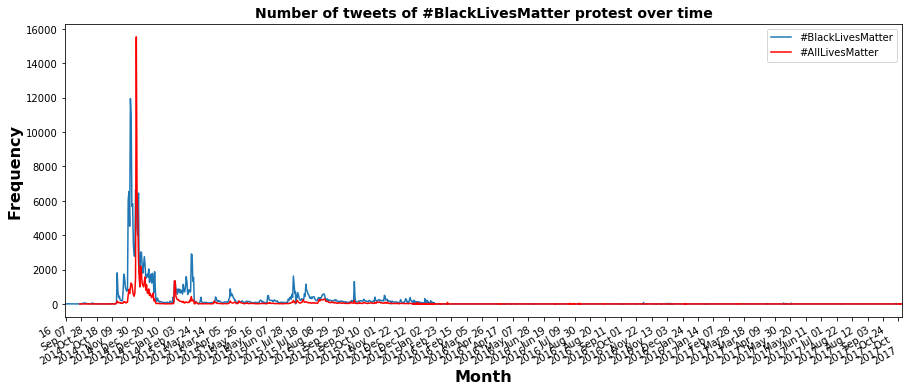

In [92]:
#Static plot
plot_num_tweets(tweet_blm, "#BlackLivesMatter", tweet_alllm, "#AllLivesMatter", date_to='14-09-2014')

In [13]:
#Interactive plot
plot_num_tweets_interactive(tweet_blm, "#BlackLivesMatter", tweet_alllm, "#AllLivesMatter", events=events)

C:\Users\adapo\Anaconda3\lib\site-packages\plotly\plotly\plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pozopere/0 or inside your plot.ly account where it is named 'simple-annotation'


C:\Users\adapo\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



** Language **

For a first analysis of the language we can find in our datasets we define the function *lang_analysis* which returns the number and percentage of the tweets in each language. In addition, it also prints 3 randomly chosen tweets.

First, we analyse the languages found with the #BlackLivesMatter hashtag. We can find 6 different languages: german (de), english (en), spanish(es), french (fr), italian (it) and dutch (nl). However, more than 97% of the tweets are in english and it can be observed that in the other languages a lot of the tweets are just made of hashtags (probably by a bot) or are written in english. It should also be mentioned that a lot are retweets.

In [170]:
#BlackLivesMatter language analysis
print(style.BOLD)
print('#BlackLivesMatter')
print(style.END) 

lang_blm=lang_analysis(tweet_blm)


#BlackLivesMatter


Number of tweets in de: 2508, 0.010332340472865248%

RT @MichaelSkolnik: Amadou. Eric. Trayvon. Tamir. Mike. #BlackLivesMatter #Sheroes http://t.co/KX58xaqEBp"
RT @BlackNerdJade: RT @Awkward_Duck: #Nigeria2000 #BlackLivesMatter"
RT @miguelmtz96: #BlackLivesMatter @_maria14m http://t.co/yzfeOBB0hP"
..................................................................................................................................

Number of tweets in en: 236297, 0.9734852698232214%

#StopRacism \\n\\nWhat does the COLOR of the dress matter anyway? IT IS A DRESS , THAT WE ALL LOVE ,WEAR &amp;, CHERISH! \\n\\nHashtag #BlackLivesMatter"
@HouriaWaBas STOP STEALING BLACK , African Americans civilright movements to advance your \"feel sorry for me\" agenda. #BlackLivesMatter"
Wake up, they still don't think our lives matter #LAPDShooting #BlackLivesMatter #NoReallyBlackLivesDoMatter"
............................................................................................

With #AllLivesMatter, we find the same languages and trends as before, with a 95% of tweets in english and the rest mostly are in english or composed only of hashtags. 

In [171]:
#AllLivesMatter
print(style.BOLD)
print('#AllLivesMatter')
print(style.END) 
lang_alllm=lang_analysis(tweet_alllm)


#AllLivesMatter


Number of tweets in de: 1426, 0.01653160829594593%

RT @BMS_ThadCastle: #PoliceLivesMatter #AllLivesMatter http://t.co/IFvJeZuFm2"
@Breaking911 @Bl4cktric #prayforgeorgezimmerman #alllivesmatter"
RT @young_freeeak: #PoliceLivesMatter"
..................................................................................................................................

Number of tweets in en: 83057, 0.9628792357898885%

RT @scandaIs: #alllivesmatter is so disrespectful especially since muslim and black lives clearly dont matter enough for u to allow us to h…"
RT @TarHeel3107: Good job guys! Keep rounding these thugs up! #PoliceLivesMatter too. #NYPD : 9 arrested, accused of threatening cops\\nhttp:…"
RT @guwop: #BlueLivesMatter people defending the planned parenthood terrorist 🤔"
..................................................................................................................................

Number of tweets in es: 709, 0.008219432175193313%

@itsBrandon

## Polarization of the hashtags

We analyse the aparition of hashtags that are considered supportive (#BlackLivesMatter) and against (#AllLiveMatters, #PoliceLivesMatter, etc.) of the protest together, to understand whether this hashtags were not as polarized (in favour or against) as it is normally thought or whether this polarization grew over time.

For this purpose, we use the function *coocurrence_hashtag* which obtains which percentage of hashtags against the protest are used with the hashtags in support, which is defined in the Helpers notebook.

Our first observation is that there are only three hashtags against the protest used in conjunction with #BlackLivesMatter: #AllLivesMatter, #PoliceLivesMatter and #NYPDLivesMatter. However, the percentage of tweets using both a hashtag supporting and against the protest is really small. The only hashtag with a more significant, although still small number is #AllLivesMatter. It is interesting that in the first month this percentage is much bigger, which probably indicates that even though this hashtag is not polarised as the others, it polarises more with time.


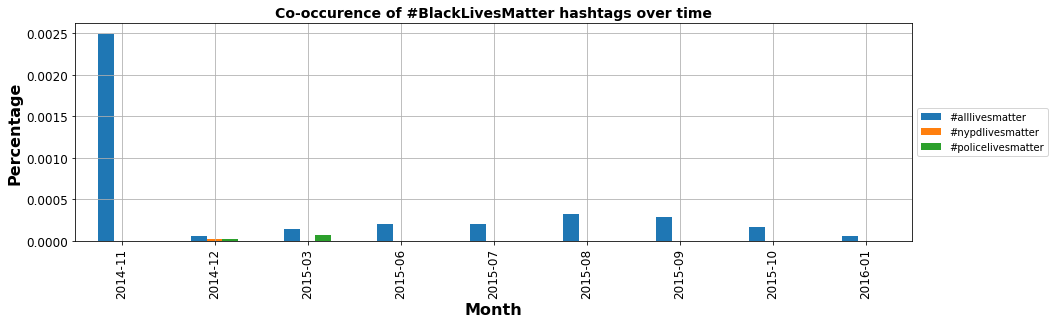

In [6]:
## Polarization of the hashtags
antitags=['#AllLivesMatter,' '#BlueLivesMatter', '#AllLivesMatter', '#WhiteLivesMattter', 
          '#NYPDLivesMatter', '#PoliceLivesMatter']
_=cooccurence_hashtag(tweet_blm, antitags, '#BlackLivesMatter')

In [58]:
#Interactive version
_=cooccurence_hashtag_interactive(tweet_blm, antitags, '#BlackLivesMatter', '#AllLivesMatter')

## Topics modelling

We analyse separately the topics for #BlackLivesMatter and #AllLivesMatter, using LDA to obtain the topics. The helper functions used are defined in the Helpers notebook

In [24]:
#BLM

preprocessing_options={'handles':False, 'urls':False}
seed = 42 # reproducibility!
random.seed(seed)
ldamodel, dictionary, doc_term_matrix =get_topics_list(tweet_blm_filter, **preprocessing_options)

data =  pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
pyLDAvis.display(data)

C:\Users\adapo\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



In [21]:
#Load data and show topics
ldamodel_blm, dictionary_blm, doc_term_matrix_blm, data_blm=pickle.load(open('./Data/tweet_blm_topics','rb'))
pyLDAvis.save_html(data_blm, 'topics_blm.html')
pyLDAvis.display(data_blm)

** All lives matter **

In [65]:
#ALLM
tweet_allm_filter=tweet_alllm[tweet_alllm['date']<'2015-11-01']
preprocessing_options={'handles':False, 'urls':False}
seed = 42 # reproducibility!
random.seed(seed)
ldamodel_alm, dictionary_alm, doc_term_matrix_alm =get_topics_list(tweet_allm_filter, **preprocessing_options)

data_alm =  pyLDAvis.gensim.prepare(ldamodel_alm, doc_term_matrix_alm, dictionary_alm)
pyLDAvis.display(data_alm)


In [29]:
#Load data and show topics
ldamodel_allm, dictionary_allm, doc_term_matrix_allm, data_allm=pickle.load(open('./Data/tweet_allm_topics','rb'))
pyLDAvis.save_html(data_allm, 'topics_allm.html')
pyLDAvis.display(data_allm)

## Sentiment analysis

We study the polarity of the tweets so we can classify them as:
* Positive: if polarity is bigger than 0
* Negative: if polarity is smaller than 0
* Neutral: if polarity is 0

In addition, we also obtain the subjectivity of the tweet which indicates whether the tweet is objective or rational (subjectivity < 0.5); subjective or emotional (subjectivity > 0.5) or neutral (subjectivity=0.5). This allows an analysis of how people react and how emotionally envolved are they.

** Black Lives Matter **

We first obtain the polarity and subjectivity and add it to the dataframe for every tweet using the *get_tweet_sentiment* function. 

In [18]:
#Get setiments
polarity_blm, subj_blm=zip(*map(lambda tweet: get_tweet_sentiment(tweet), tweet_blm.text.values))
tweet_blm['polarity']=polarity_blm
tweet_blm['subj']=subj_blm

_Polarity_

Polarity of BlackLivesMatter
Percentage of positive tweets: 21.69516311658994%
    Mean: 0.2717823706084528
    Std: 0.2199583554872849 
Percentage of neutral tweets: 35.87310827231177%
Percentage of negative tweets: 42.43172861109829%
    Mean: -0.23395988056396497
    Std: 0.146828892735629 
Events 
0 Tamir Rice killed by police in Cleveland while playing with a toy gun
1 Announcement of no indictment in Michael Brown Case
2 Announcement of no indictment in Garner case
3 Lebron James, Kobe Bryant and the LA Lakers wears an #ICantBreathe shirt during a game
4 Two police officers are killed in NY while in their patrol car
5 In March 2015, 36 black people were killed by police
6 Freddie Gray dies in police custody in Baltimore
7 9 dead in a shooting at church in Charleston
8 Sandra Bland dies in police custody in Texas (#SayHerName)
9 One year anniversary of the death of Micheal Brown
10 Bernie Sanders defends #BlackLivesMatter on debate
11 2016 Oscars


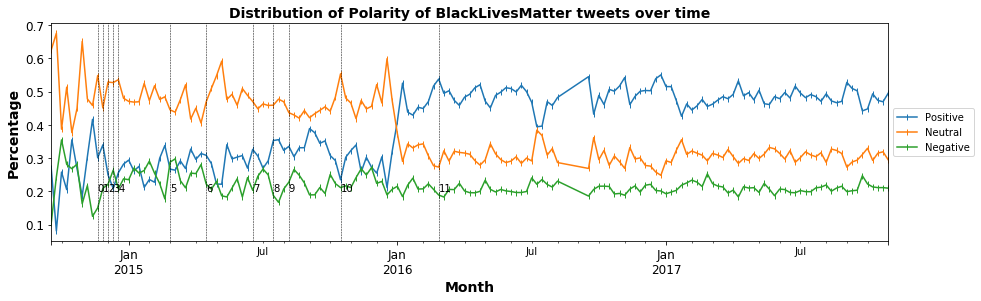

In [21]:
_=plot_type_sentiment('polarity',tweet_blm, 'BlackLivesMatter', events=events, date_to='14-09-2014')

In [30]:
plot_type_sentiment_interactive('polarity',tweet_blm, '#BlackLivesMatter', events=events, date_to='14-09-2014')

Polarity of #BlackLivesMatter
Percentage of positive tweets: 21.69516311658994%
    Mean: 0.2717823706084528
    Std: 0.2199583554872849 
Percentage of neutral tweets: 35.87310827231177%
Percentage of negative tweets: 42.43172861109829%
    Mean: -0.23395988056396497
    Std: 0.146828892735629 
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pozopere/0 or inside your plot.ly account where it is named 'simple-annotation'


_Subjectivity_

Subjectivity of #BlackLivesMatter
Percentage of subjective tweets: 44.0905213365468%
    Mean: 0.8383986977612922
    Std: 0.1731058155147529 
Percentage of neutral tweets: 4.218681413594291%
Percentage of rational tweets: 51.69079724985891%
    Mean: 0.11379229184954576
    Std: 0.17077821070718122 
Events 
0 Tamir Rice killed by police in Cleveland while playing with a toy gun
1 Announcement of no indictment in Michael Brown Case
2 Announcement of no indictment in Garner case
3 Lebron James, Kobe Bryant and the LA Lakers wears an #ICantBreathe shirt during a game
4 Two police officers are killed in NY while in their patrol car
5 In March 2015, 36 black people were killed by police
6 Freddie Gray dies in police custody in Baltimore
7 9 dead in a shooting at church in Charleston
8 Sandra Bland dies in police custody in Texas (#SayHerName)
9 One year anniversary of the death of Micheal Brown
10 Bernie Sanders defends #BlackLivesMatter on debate
11 2016 Oscars


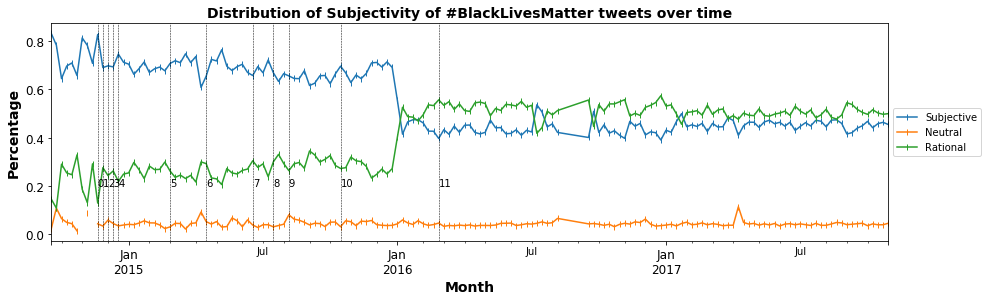

In [6]:
tweet_blm=pickle.load(open('./Data/tweet_blm_sentiment','rb'))
_=plot_type_sentiment('subj',tweet_blm, '#BlackLivesMatter', events=events, date_to='14-09-2014')

In [10]:
plot_type_sentiment_interactive('subj',tweet_blm, '#BlackLivesMatter', events=events, date_to='14-09-2014')

Subjectivity of #BlackLivesMatter
Percentage of subjective tweets: 44.0905213365468%
    Mean: 0.8383986977612922
    Std: 0.1731058155147529 
Percentage of neutral tweets: 4.218681413594291%
Percentage of rational tweets: 51.69079724985891%
    Mean: 0.11379229184954576
    Std: 0.17077821070718122 
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pozopere/0 or inside your plot.ly account where it is named 'simple-annotation'


** All Lives Matter **

As with #BlackLivesMatter, we first obtain the sentiment of each tweet and then plot separately the percentage of tweets of each of the categories of subjectivity and polarity.

In [243]:
#Get sentiment
polarity_allm, subj_allm=zip(*map(lambda tweet: get_tweet_sentiment(tweet), tweet_alllm.text.values))
tweet_alllm['polarity']=polarity_allm
tweet_alllm['subj']=subj_allm

_Polarity_ 

Polarity of AllLivesMatter
Percentage of positive tweets: 19.937652865411287%
    Mean: 0.31012743992639863
    Std: 0.23266764501958123 
Percentage of neutral tweets: 43.670887710589454%
Percentage of negative tweets: 36.39145942399926%
    Mean: -0.26929353503355546
    Std: 0.18040845668209934 
Events 
0 Tamir Rice killed by police in Cleveland while playing with a toy gun
1 Announcement of no indictment in Michael Brown Case
2 Announcement of no indictment in Garner case
3 Lebron James, Kobe Bryant and the LA Lakers wears an #ICantBreathe shirt during a game
4 Two police officers are killed in NY while in their patrol car
5 In March 2015, 36 black people were killed by police
6 Freddie Gray dies in police custody in Baltimore
7 9 dead in a shooting at church in Charleston
8 Sandra Bland dies in police custody in Texas (#SayHerName)
9 One year anniversary of the death of Micheal Brown
10 Bernie Sanders defends #BlackLivesMatter on debate
11 2016 Oscars


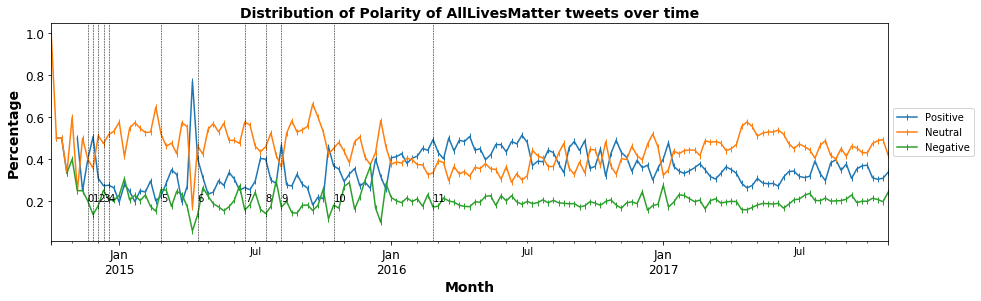

In [26]:
_=plot_type_sentiment('polarity',tweet_alllm, 'AllLivesMatter',  events=events, date_to='14-09-2014')

In [36]:
plot_type_sentiment_interactive('polarity',tweet_alllm, 'AllLivesMatter', events=events, date_to='14-09-2014')

Polarity of AllLivesMatter
Percentage of positive tweets: 19.937652865411287%
    Mean: 0.31012743992639863
    Std: 0.23266764501958123 
Percentage of neutral tweets: 43.670887710589454%
Percentage of negative tweets: 36.39145942399926%
    Mean: -0.26929353503355546
    Std: 0.18040845668209934 
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pozopere/0 or inside your plot.ly account where it is named 'simple-annotation'


_Subjectivity_

Subjectivity of #AllLivesMatter
Percentage of subjective tweets: 40.07053330120207%
    Mean: 0.8433679148979899
    Std: 0.17197416704773721 
Percentage of neutral tweets: 3.9834990425402355%
Percentage of rational tweets: 55.94596765625769%
    Mean: 0.08261052521796632
    Std: 0.14949084290128112 
Events 
0 Two police officers are killed in NY while in their patrol car
1 In March 2015, 36 black people were killed by police
2 Freddie Gray dies in police custody in Baltimore
3 9 dead in a shooting at church in Charleston
4 Sandra Bland dies in police custody in Texas (#SayHerName)
5 One year anniversary of the death of Micheal Brown
6 Bernie Sanders defends #BlackLivesMatter on debate
7 2016 Oscars


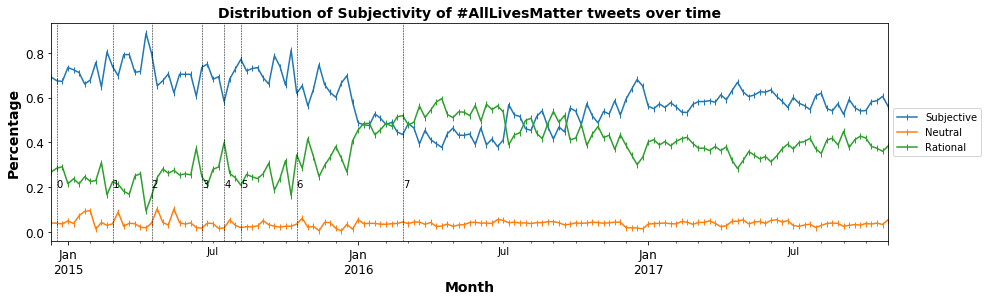

In [4]:
tweet_alllm=pickle.load(open('./Data/tweet_allm_sentiment','rb'))
_=plot_type_sentiment('subj',tweet_alllm, '#AllLivesMatter', events=events, date_to='12-09-2014')

In [9]:
plot_type_sentiment_interactive('subj',tweet_alllm, '#AllLivesMatter', events=events, date_to='14-09-2014')

Subjectivity of #AllLivesMatter
Percentage of subjective tweets: 40.02665378744638%
    Mean: 0.8430890427200343
    Std: 0.17200779540413963 
Percentage of neutral tweets: 3.9843796408453795%
Percentage of rational tweets: 55.98896657170825%
    Mean: 0.0827815361355893
    Std: 0.14960792561100633 
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pozopere/0 or inside your plot.ly account where it is named 'simple-annotation'


**Comparison of sentiment analysis in favour and against the protest**

We plot both the mean polarity and subjectivity of both groups of the protest aggregated by week, in order to have more consistent trends than by day. In blue we show the #BlackLivesMatter tweets, while #AllLiveMatters are in blue. We do not plot the number of tweets consider positive, negative and so on because we consider more informative to know if they are slightly positive (small value of polarity) than the overall numbers

_Polarity_

First, we plot the polarity aggregating by the mean, as the std is small. The figure shows what we already observed, for both groups the trends are very similar and tend to be around 0, that is they are neutral and slightly positive or negative. It is interested to see that when they were few tweets they had a great polarization, but as the number grows they tend to get more neutral. It is also interesting that as time grows the tweets seem to be moving towards being slightly negative.

0 Tamir Rice killed by police in Cleveland while playing with a toy gun
1 Announcement of no indictment in Michael Brown Case
2 Announcement of no indictment in Garner case
3 Lebron James, Kobe Bryant and the LA Lakers wears an #ICantBreathe shirt during a game
4 Two police offiers are killed in NY while in their patrol car
5 In March 2015, 36 black people were killed by police
6 Freddie Gray dies in police custody in Baltimore
7 9 dead in a shooting at church in Charleston
8 Sandra Bland dies in police custody in Texas (#SayHerName)
9 Bernie Sanders defends #BlackLivesMatter on debate
10 2016 Oscars


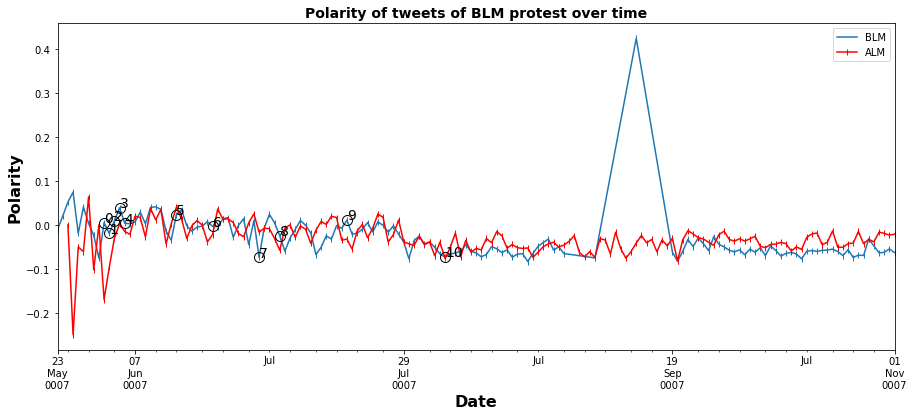

In [193]:
plot_sentiment_tweets('polarity',tweet_blm, 'BLM', tweet_alllm, 'ALM', events=events, date_to='14-09-2014')

In [2]:
plot_sentiment_tweets_interactive('polarity',tweet_blm, '#BlackLivesMatter', tweet_alllm, '#AllLivesMatter', events=events, metric='mean', date_to='14-09-2014')

_Subjectivity_

Given the bigger standard deviations, we use the median to aggregate the subjectivity. We can observe that in the months were the protest was more viral (December and January 2015) the trends from both sides of the protest were similar. However, as time passes the tweets supporting #BlackLivesMatter tend to be more rational, while the ones against are still very emotional. Despite this, overall we can say that for this protest both of the sides tend to be very emotional.


0 Tamir Rice killed by police in Cleveland while playing with a toy gun
1 Announcement of no indictment in Michael Brown Case
2 Announcement of no indictment in Garner case
3 Lebron James, Kobe Bryant and the LA Lakers wears an #ICantBreathe shirt during a game
4 Two police offiers are killed in NY while in their patrol car
5 In March 2015, 36 black people were killed by police
6 Freddie Gray dies in police custody in Baltimore
7 9 dead in a shooting at church in Charleston
8 Sandra Bland dies in police custody in Texas (#SayHerName)
9 Bernie Sanders defends #BlackLivesMatter on debate
10 2016 Oscars


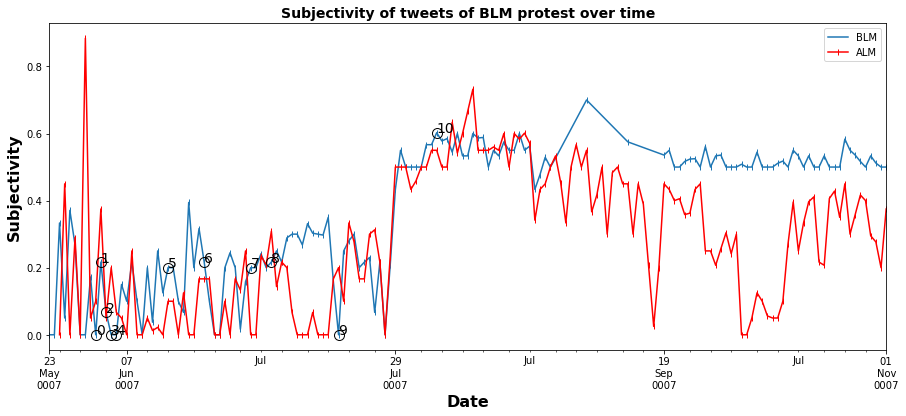

In [192]:
plot_sentiment_tweets('subj',tweet_blm, 'BLM', tweet_alllm, 'ALM', events=events, metric='median', date_to='14-09-2014')

In [12]:
plot_sentiment_tweets_interactive('subj',tweet_blm, '#BlackLivesMatter', tweet_alllm, '#AllLivesMatter', events=events, metric='median', date_to='14-05-2014')